In [2]:
!pip install numpy pandas scikit-learn matplotlib

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [8]:
data = {
    'StudyHours' : [1,2,3,4,5,6,7,8,9,10],
    'Pass' : [0,0,0,0,0,1,1,1,1,1] # 0 = Fail, 1 = Pass; 
}
df = pd.DataFrame(data)
print(df.head())

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0


Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)
Intercept: [-6.28495636]
Coefficient: [1.14270903]
Predicted outcomes (pass/fail):  [1 0]
Actual outcomes:  [1 0]
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\jevge\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


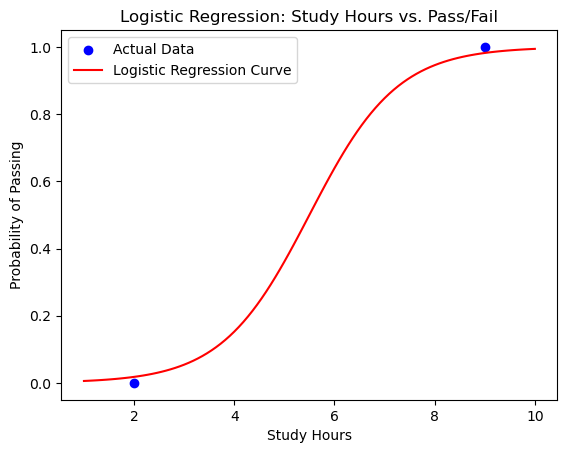

In [12]:
X = df[['StudyHours']]
Y = df['Pass']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, {Y_train.shape}" )
print(f"Testing data: {X_test.shape}, {Y_test.shape}" )
model = LogisticRegression()
model.fit(X_train, Y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
Y_pred = model.predict(X_test)
print("Predicted outcomes (pass/fail): ", Y_pred)
print("Actual outcomes: ", Y_test.values)
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Generate classification report
class_report = classification_report(Y_test, Y_pred)
# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
Y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, Y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()